<h2>Fase 1: Business Understanding</h2>


<h5>Importar librerías y base de datos</h5>

<h5>Esto hay que cambiarlo, solo es lo del pdf. Hay que incluir una hipotesis de como podemos ayudar al Dormamu</h5>

<p>
Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su
comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos
hacen de sus productos financieros

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que
sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes,
preparar una estrategia y abordar a este nuevo mercado.
</p>

<h3>Revisar con chatgpt</h3>Decidimos concentrarnos en el uso de tarjeta de credito del cliente ya que nosotros hipotetizamos que es en donde se mueve mas dinero para el cliente y donde podriamos ver mas posibles ganancias que podrian darle interes al banco Dormamu

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
MONOPOLY_XLSX ='Base_clientes_Monopoly.xlsx'
MONOPOLY_CSV ='Base_clientes_Monopoly_otro.csv'

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
df = pd.read_excel(MONOPOLY_XLSX)
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


<h2>Fase 2: Data Understanding</h2>

- TC: Indica si el cliente posee una tarjeta de crédito.
- Consumo,  Cuentas: Reflejan el uso de otros productos bancarios.
- CUPO_L1, CUPO_MX: Indican el límite de crédito disponible.
- FlgActCOL_TX , Txs_TX
- FacCCOT_X
<br><br>


<p>Region<br>
Renta<br>
Edad<br>
Sexo<br>
Adicional<br>
Consumo<br>
Cuentas<br>
Monoproducto ________________________| Indicador de si el cliente es solo poseedor de una TC<br> 
TC<br>
Internauta____________________________<br>
Dualidad ___________________________| Indicador de Dualidad (Cliente es dual si tiene 2 o mas TC)<br><br>
CUPO_L1 ____________________________| Cupo de la tarjeta credito para compras nacionales<br>
CUPO_MX ____________________________| Cupo de la tarjeta credito para compras internacionales<br>
FlgActCOL_T12 _______________________| Indicador de actividad en avances en cuotas con tasa en el mes X en la TC<br>
Txs_T12 _____________________________| Numero de transacciones realizados por el cliente en TC en el mes X<br>
FacCCOT_T12__________________________| Monto facturado en compras en cuotas con tasa por el cliente en TC en el mes X<br></p>

In [16]:
df_monopoly = (df[['Region', 'Renta', 'Edad','Sexo', 'Adicional','Consumo', 'Cuentas', 'Monoproducto' , 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'Txs_T12']])
df_monopoly

,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,CUPO_L1,CUPO_MX,FlgActCOL_T12,Txs_T12
0,13.0,NaN,43,M,1,0,1,0,3,0,798000,1210.0,0.0,3.0
1,13.0,143640.0,46,H,0,0,1,0,1,0,750000,1000.0,0.0,1.0
2,13.0,929106.0,45,H,1,0,1,0,2,0,1350000,1500.0,0.0,3.0
3,13.0,172447.0,46,H,1,0,1,1,2,0,1570800,0.0,0.0,3.0
4,13.0,805250.0,46,H,1,0,2,0,3,1,2762000,6430.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,364978.0,51,H,1,0,2,0,3,1,999000,550.0,0.0,9.0
51120,13.0,625376.0,51,H,0,0,1,0,1,0,1744200,300.0,0.0,1.0
51121,13.0,806220.0,47,H,1,0,1,0,2,0,1061000,1526.0,0.0,3.0
51122,13.0,NaN,47,M,0,0,1,0,1,0,1612000,2300.0,NaN,NaN


In [17]:
print(df_monopoly.shape)
print(df_monopoly.dtypes)
print(df_monopoly.info())

(51124, 14)
Region           float64
Renta            float64
Edad               int64
Sexo              object
Adicional          int64
Consumo            int64
Cuentas            int64
Monoproducto       int64
TC                 int64
Dualidad           int64
CUPO_L1            int64
CUPO_MX          float64
FlgActCOL_T12    float64
Txs_T12          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         51071 non-null  float64
 1   Renta          37759 non-null  float64
 2   Edad           51124 non-null  int64  
 3   Sexo           51123 non-null  object 
 4   Adicional      51124 non-null  int64  
 5   Consumo        51124 non-null  int64  
 6   Cuentas        51124 non-null  int64  
 7   Monoproducto   51124 non-null  int64  
 8   TC             51124 non-null  int64  
 9   Dualidad       51124 non-n

In [13]:
max_cards_customer = df.loc[df['TC'].idxmax()]
print(f"The customer with the most credit cards is {max_cards_customer['Id']} with {max_cards_customer['TC']} credit cards.")

The customer with the most credit cards is 2718 with 12 credit cards.


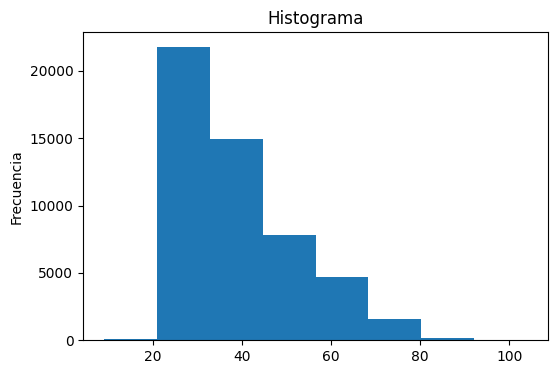

In [18]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.hist(df_monopoly["Edad"], bins = 8)

plt.xlabel("")
plt.ylabel("Frecuencia")
plt.title("Histograma");

In [19]:
categorical_columns = df_monopoly.select_dtypes(include=['object']).columns
df_categoric = df_monopoly[categorical_columns]
print(categorical_columns)

numeric_features = df_monopoly.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_monopoly[numeric_features]
print(numeric_features)

Index(['Sexo'], dtype='object')
Index(['Region', 'Renta', 'Edad', 'Adicional', 'Consumo', 'Cuentas',
       'Monoproducto', 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12',
       'Txs_T12'],
      dtype='object')


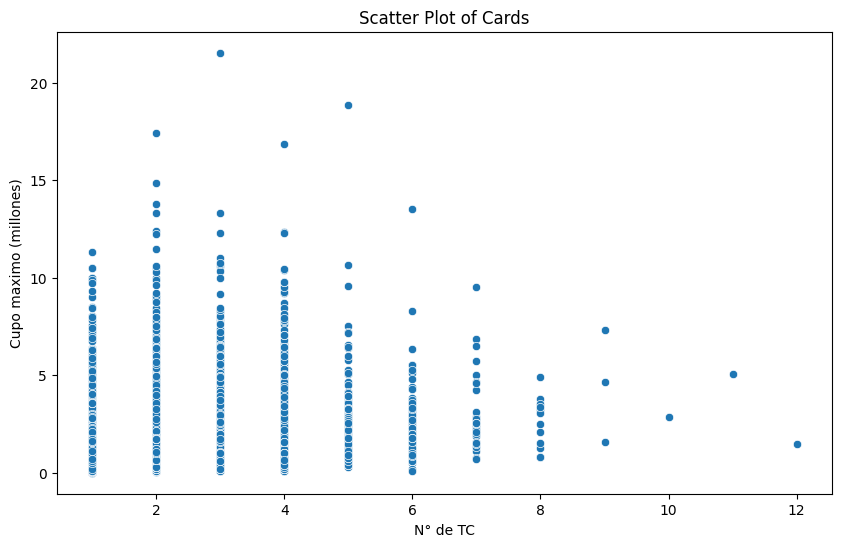

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TC', y=df['CUPO_L1']/1000000, data=df)
plt.title('Scatter Plot of Cards')
plt.xlabel('N° de TC')
plt.ylabel('Cupo maximo (millones)')
plt.show()

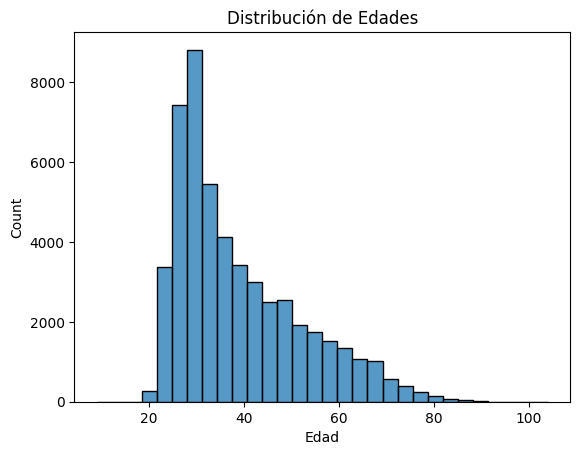

In [21]:
# Histograma de la variable Edad
sns.histplot(data=df, x='Edad', bins=30)
plt.title('Distribución de Edades')
plt.show()

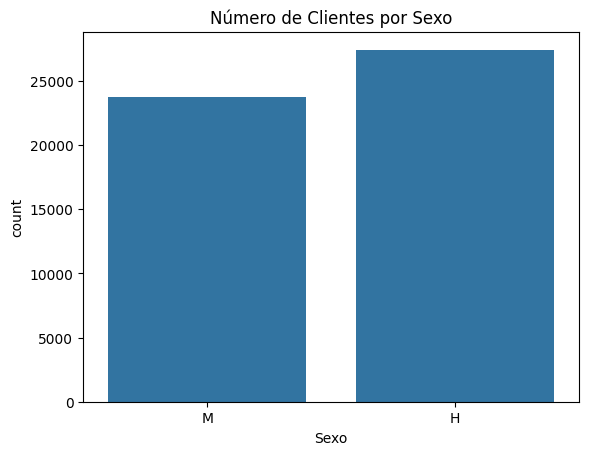

In [22]:
# Gráfico de barras del número de clientes por sexo
sns.countplot(data=df, x='Sexo')
plt.title('Número de Clientes por Sexo')
plt.show()

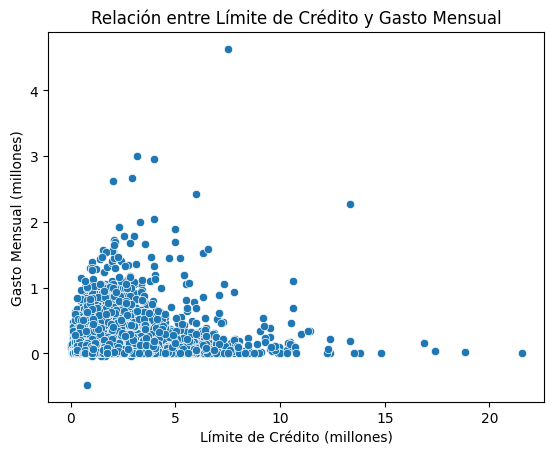

In [23]:
# Diagrama de dispersión entre límite de crédito y gasto mensual
sns.scatterplot(data=df, x=df['CUPO_L1']/1000000, y=df['Fac_T12']/1000000)
plt.title('Relación entre Límite de Crédito y Gasto Mensual')
plt.xlabel('Límite de Crédito (millones)')
plt.ylabel('Gasto Mensual (millones)')
plt.show()

In [24]:
gasto_menor_a_cero = df[df['Fac_T12'] < 0]

# Seleccionar solo las columnas 'ID' y 'Gasto Mensual'
gasto_menor_a_cero[['Id', 'Fac_T12']]

,Id,Fac_T12
1579,1580,-39593.0
19589,19590,-33251.0
21253,21254,-39990.0
40294,40295,-36280.0
45434,45435,-480000.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona las columnas que quieres normalizar
columns_to_normalize = ['Renta', 'Edad', 'Cuentas','TC']  # Reemplaza con los nombres de tus columnas

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
df_norm = df_monopoly
# Ajusta el scaler a las columnas seleccionadas
df_norm[columns_to_normalize] = scaler.fit_transform(df_monopoly[columns_to_normalize])
df_norm



C:\Users\Eitan\AppData\Local\Temp\ipykernel_11852\2420000753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[columns_to_normalize] = scaler.fit_transform(df_monopoly[columns_to_normalize])


,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,CUPO_L1,CUPO_MX,FlgActCOL_T12,Txs_T12
0,13.0,NaN,0.357895,M,1,0,0.00,0,0.181818,0,798000,1210.0,0.0,3.0
1,13.0,0.010974,0.389474,H,0,0,0.00,0,0.000000,0,750000,1000.0,0.0,1.0
2,13.0,0.070982,0.378947,H,1,0,0.00,0,0.090909,0,1350000,1500.0,0.0,3.0
3,13.0,0.013175,0.389474,H,1,0,0.00,1,0.090909,0,1570800,0.0,0.0,3.0
4,13.0,0.061520,0.389474,H,1,0,0.25,0,0.181818,1,2762000,6430.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,0.027884,0.442105,H,1,0,0.25,0,0.181818,1,999000,550.0,0.0,9.0
51120,13.0,0.047777,0.442105,H,0,0,0.00,0,0.000000,0,1744200,300.0,0.0,1.0
51121,13.0,0.061594,0.400000,H,1,0,0.00,0,0.090909,0,1061000,1526.0,0.0,3.0
51122,13.0,NaN,0.400000,M,0,0,0.00,0,0.000000,0,1612000,2300.0,NaN,NaN


In [47]:
scaler = StandardScaler()
var_estand = ['CUPO_L1', 'CUPO_MX', 'FlgActCOL_T12', 'Txs_T12']
df_scaled = scaler.fit_transform(df_monopoly[var_estand])


df_norm[var_estand] = df_scaled 

df_norm

C:\Users\Eitan\AppData\Local\Temp\ipykernel_11852\1003893983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[var_estand] = df_scaled


,Region,Renta,Edad,Sexo,Adicional,Consumo,Cuentas,Monoproducto,TC,Dualidad,CUPO_L1,CUPO_MX,FlgActCOL_T12,Txs_T12
0,13.0,NaN,0.357895,M,1,0,0.00,0,0.181818,0,-0.311248,-0.119149,-0.056411,0.110285
1,13.0,0.010974,0.389474,H,0,0,0.00,0,0.000000,0,-0.355820,-0.250618,-0.056411,-0.423588
2,13.0,0.070982,0.378947,H,1,0,0.00,0,0.090909,0,0.201329,0.062404,-0.056411,0.110285
3,13.0,0.013175,0.389474,H,1,0,0.00,1,0.090909,0,0.406359,-0.876664,-0.056411,0.110285
4,13.0,0.061520,0.389474,H,1,0,0.25,0,0.181818,1,1.512486,3.148807,-0.056411,0.911095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,13.0,0.027884,0.442105,H,1,0,0.25,0,0.181818,1,-0.124603,-0.532339,-0.056411,1.711905
51120,13.0,0.047777,0.442105,H,0,0,0.00,0,0.000000,0,0.567375,-0.688850,-0.056411,-0.423588
51121,13.0,0.061594,0.400000,H,1,0,0.00,0,0.090909,0,-0.067031,0.078681,-0.056411,0.110285
51122,13.0,NaN,0.400000,M,0,0,0.00,0,0.000000,0,0.444617,0.563240,NaN,NaN


In [55]:
df_norm = df_norm.drop(['Sexo'], axis=1)

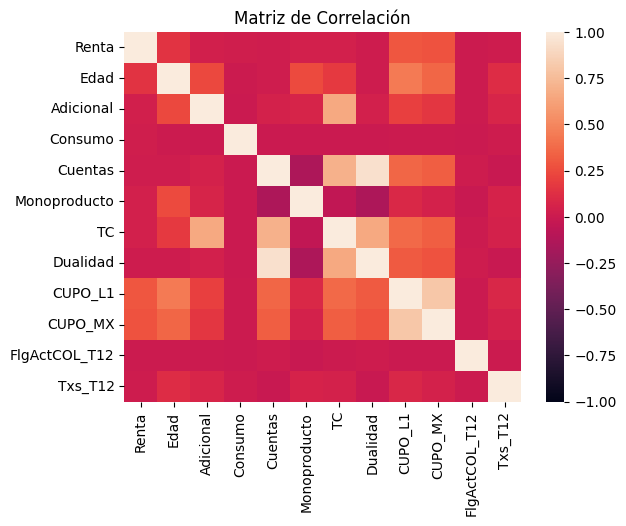

In [56]:
# Matriz de correlación
corr_matrix = df_norm.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [32]:
df.isnull().sum()

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

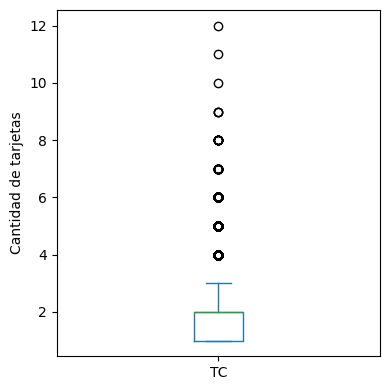

In [42]:
ax = (df['TC']).plot.box(figsize=(4, 4))
ax.set_ylabel('Cantidad de tarjetas')

plt.tight_layout()
plt.show()

<h2>Fase 3: Data Preparation</h2>